In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Read the CSV file
df = pd.read_csv('../data/fanti-waxs.csv')

import numpy as np
from scipy.optimize import curve_fit

# Define the logistic function (S-curve)
def s_curve(x, L, k, x0, b):
    return L / (1 + np.exp(-k*(x-x0))) + b

# Calculate midpoint of known years and year range
df['Year_Mid'] = (df['Known Max Yr'] + df['Known Min Yr']) / 2
df['Year_Range'] = (df['Known Max Yr'] - df['Known Min Yr']) / 2

# Let's first check our x values
mask_valid = df['Known Min Yr'].notna() & df['Known Max Yr'].notna()
x = df[mask_valid]['Year_Mid']
y = df[mask_valid]['Aging Factor']

print("X values (Year_Mid):")
print(sorted(x))


print("imports")


X values (Year_Mid):
[-3250.0, -860.0, -375.0, -290.0, 64.5, 574.5, 1072.0, 2000.0, 2000.0, 2000.0]
imports


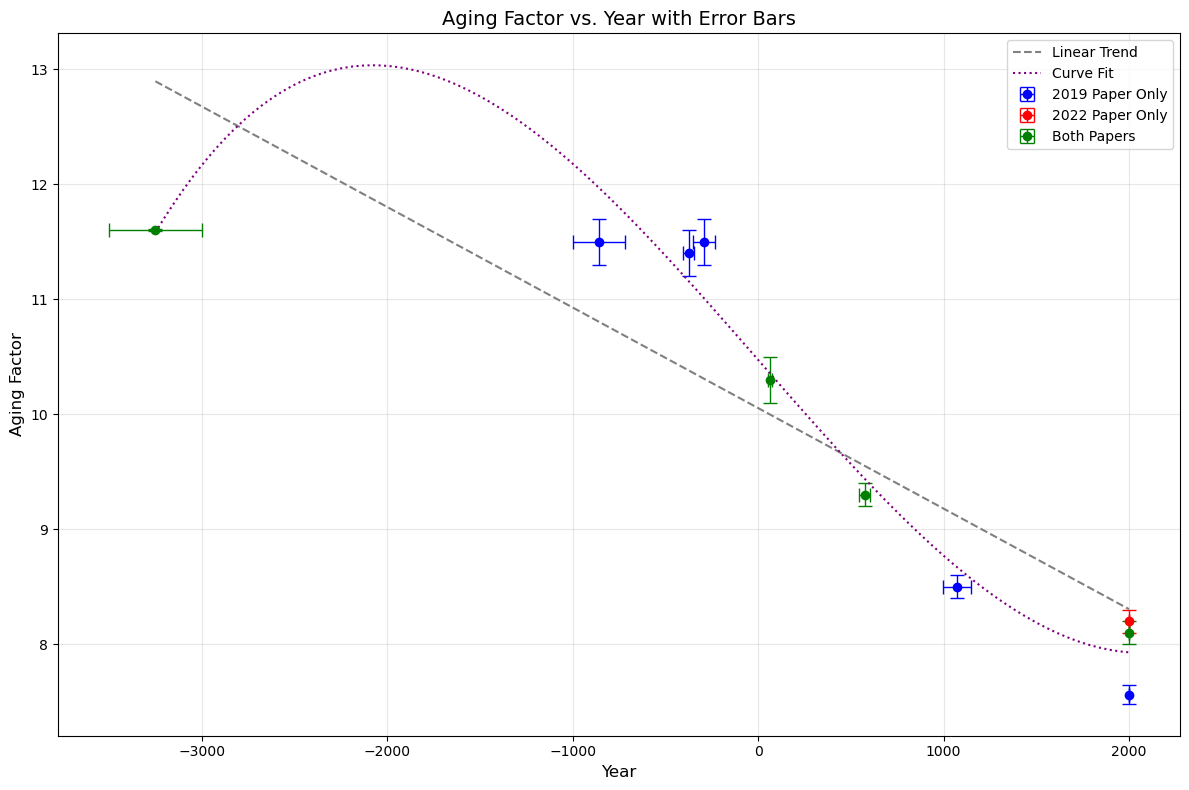

In [4]:
# Create figure and axis with a larger size
plt.figure(figsize=(12, 8))

# Define masks for different paper categories
mask_2019_only = (df['2019 Paper'] == 1) & (df['2022 Paper'] == 0)
mask_2022_only = (df['2019 Paper'] == 0) & (df['2022 Paper'] == 1)
mask_both = (df['2019 Paper'] == 1) & (df['2022 Paper'] == 1)

# Plot points
# 2019 only papers
plt.errorbar(df[mask_2019_only]['Year_Mid'], df[mask_2019_only]['Aging Factor'],
            xerr=df[mask_2019_only]['Year_Range'],
            yerr=df[mask_2019_only]['Aging Factor Error'],
            fmt='o', color='blue', label='2019 Paper Only', 
            capsize=5, capthick=1, elinewidth=1)

# 2022 only papers
plt.errorbar(df[mask_2022_only]['Year_Mid'], df[mask_2022_only]['Aging Factor'],
            xerr=df[mask_2022_only]['Year_Range'],
            yerr=df[mask_2022_only]['Aging Factor Error'],
            fmt='o', color='red', label='2022 Paper Only',
            capsize=5, capthick=1, elinewidth=1)

# Both papers
plt.errorbar(df[mask_both]['Year_Mid'], df[mask_both]['Aging Factor'],
            xerr=df[mask_both]['Year_Range'],
            yerr=df[mask_both]['Aging Factor Error'],
            fmt='o', color='green', label='Both Papers',
            capsize=5, capthick=1, elinewidth=1)

# Calculate and plot trendlines
mask_valid = df['Known Min Yr'].notna() & df['Known Max Yr'].notna()
x = df[mask_valid]['Year_Mid']
y = df[mask_valid]['Aging Factor']

# Linear fit
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, p(x_line), '--', color='gray', label='Linear Trend')

# Higher order polynomial fit (degree=3 for smooth curve)
z_curve = np.polyfit(x, y, 3)
p_curve = np.poly1d(z_curve)
plt.plot(x_line, p_curve(x_line), ':', color='purple', label='Curve Fit')

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Aging Factor', fontsize=12)
plt.title('Aging Factor vs. Year with Error Bars', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


2019 S-curve parameters:
L (height): -3.870
k (steepness): 0.003
x0 (midpoint): 396.160
b (offset): 11.701

2022 S-curve parameters:
L (height): -3.580
k (steepness): 0.002
x0 (midpoint): 313.427
b (offset): 11.601


/tmp/ipykernel_235304/364565533.py:61: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_2022, _ = curve_fit(s_curve, x_2022, y_2022, p0=p0_2022, maxfev=10000)


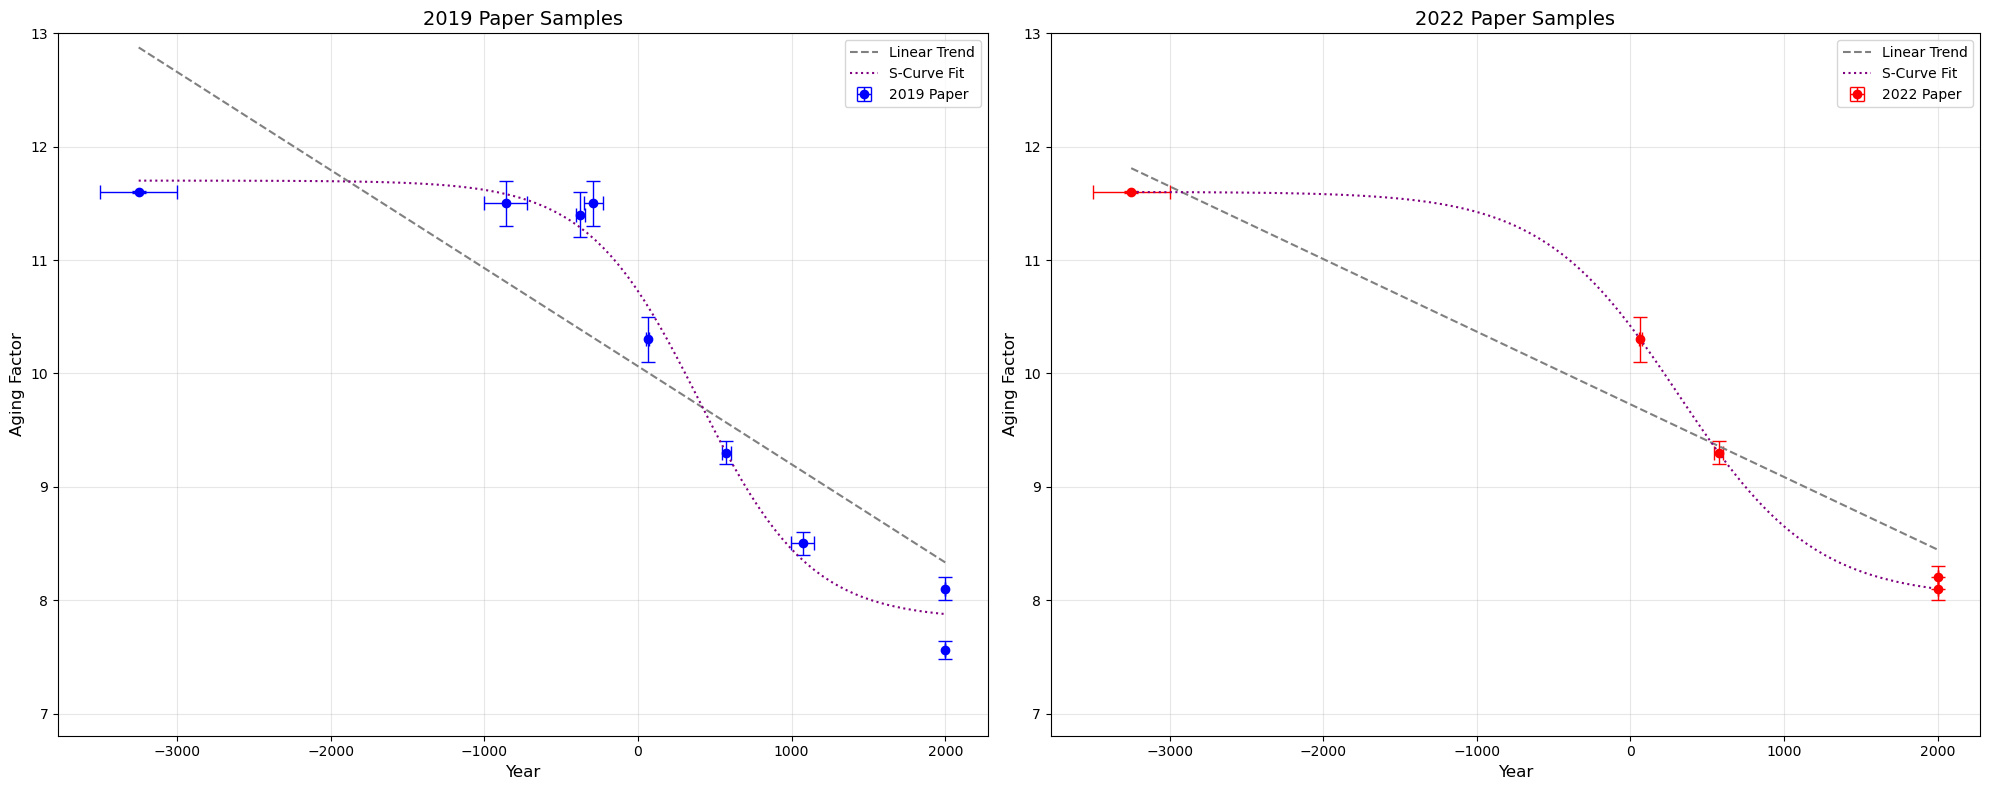

In [2]:
# Define the logistic function (S-curve)
def s_curve(x, L, k, x0, b):
   return L / (1 + np.exp(-k*(x-x0))) + b

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 2019 Plot (left)
mask_2019 = (df['2019 Paper'] == 1)
x_2019 = df[mask_2019]['Year_Mid']
y_2019 = df[mask_2019]['Aging Factor']

# Plot 2019 points
ax1.errorbar(x_2019, y_2019,
           xerr=df[mask_2019]['Year_Range'],
           yerr=df[mask_2019]['Aging Factor Error'],
           fmt='o', color='blue', label='2019 Paper', 
           capsize=5, capthick=1, elinewidth=1)

# 2019 Linear fit
z_2019 = np.polyfit(x_2019, y_2019, 1)
p_2019 = np.poly1d(z_2019)
x_line_2019 = np.linspace(x_2019.min(), x_2019.max(), 100)
ax1.plot(x_line_2019, p_2019(x_line_2019), '--', color='gray', label='Linear Trend')

# 2019 S-curve fit
p0_2019 = [max(y_2019) - min(y_2019),  # L: curve height
          0.001,                        # k: steepness
          np.mean(x_2019),             # x0: midpoint
          min(y_2019)]                 # b: offset

popt_2019, _ = curve_fit(s_curve, x_2019, y_2019, p0=p0_2019, maxfev=10000)
y_s_2019 = s_curve(x_line_2019, *popt_2019)
ax1.plot(x_line_2019, y_s_2019, ':', color='purple', label='S-Curve Fit')

# 2022 Plot (right)
mask_2022 = (df['2022 Paper'] == 1) & (df['Year_Mid'].notna())  # Filter out NaN
df_2022 = df[mask_2022].drop_duplicates('Year_Mid')  # Remove duplicates
x_2022 = df_2022['Year_Mid']
y_2022 = df_2022['Aging Factor']

# Plot all 2022 points (including duplicates) for display
ax2.errorbar(df[mask_2022]['Year_Mid'], df[mask_2022]['Aging Factor'],
           xerr=df[mask_2022]['Year_Range'],
           yerr=df[mask_2022]['Aging Factor Error'],
           fmt='o', color='red', label='2022 Paper', 
           capsize=5, capthick=1, elinewidth=1)

# 2022 Linear fit using unique points
z_2022 = np.polyfit(x_2022, y_2022, 1)
p_2022 = np.poly1d(z_2022)
x_line_2022 = np.linspace(x_2022.min(), x_2022.max(), 100)
ax2.plot(x_line_2022, p_2022(x_line_2022), '--', color='gray', label='Linear Trend')

# 2022 S-curve fit
p0_2022 = [max(y_2022) - min(y_2022),  # L: curve height
          0.001,                        # k: steepness
          np.mean(x_2022),             # x0: midpoint
          min(y_2022)]                 # b: offset

popt_2022, _ = curve_fit(s_curve, x_2022, y_2022, p0=p0_2022, maxfev=10000)
y_s_2022 = s_curve(x_line_2022, *popt_2022)
ax2.plot(x_line_2022, y_s_2022, ':', color='purple', label='S-Curve Fit')

# Customize plots
for ax in [ax1, ax2]:
   ax.set_xlabel('Year', fontsize=12)
   ax.set_ylabel('Aging Factor', fontsize=12)
   ax.legend()
   ax.grid(True, alpha=0.3)

ax1.set_title('2019 Paper Samples', fontsize=14)
ax2.set_title('2022 Paper Samples', fontsize=14)

# Set y-axis limits to better show the data
y_min = min(df['Aging Factor'].min() * 0.9, 7)  # Give some padding below
y_max = max(df['Aging Factor'].max() * 1.1, 13)  # Give some padding above
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Print the S-curve parameters for comparison
print("\n2019 S-curve parameters:")
print(f"L (height): {popt_2019[0]:.3f}")
print(f"k (steepness): {popt_2019[1]:.3f}")
print(f"x0 (midpoint): {popt_2019[2]:.3f}")
print(f"b (offset): {popt_2019[3]:.3f}")

print("\n2022 S-curve parameters:")
print(f"L (height): {popt_2022[0]:.3f}")
print(f"k (steepness): {popt_2022[1]:.3f}")
print(f"x0 (midpoint): {popt_2022[2]:.3f}")
print(f"b (offset): {popt_2022[3]:.3f}")

# Adjust layout
plt.tight_layout()
plt.show()

TS Sample data:
   Sample Name  Aging Factor  Aging Factor Error
10          TS          10.0                 0.2

Predicted age for TS sample: 60.4 years


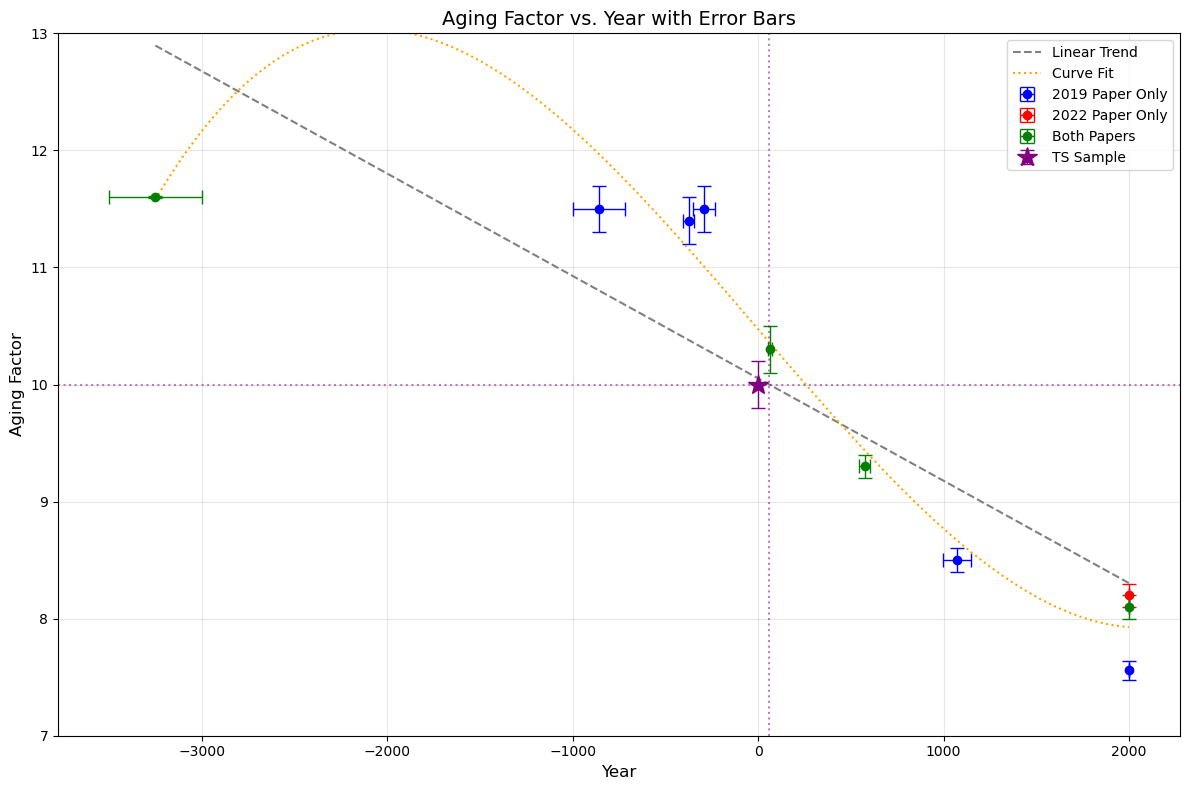

In [5]:
# Let's look at the TS sample
ts_sample = df[df['Sample Name'] == 'TS']
print("TS Sample data:")
print(ts_sample[['Sample Name', 'Aging Factor', 'Aging Factor Error']].to_string())

# Create the combined plot
plt.figure(figsize=(12, 8))

# Define masks for different paper categories
mask_2019_only = (df['2019 Paper'] == 1) & (df['2022 Paper'] == 0)
mask_2022_only = (df['2019 Paper'] == 0) & (df['2022 Paper'] == 1)
mask_both = (df['2019 Paper'] == 1) & (df['2022 Paper'] == 1)
mask_valid = df['Known Min Yr'].notna() & df['Known Max Yr'].notna()

# Plot points
plt.errorbar(df[mask_2019_only]['Year_Mid'], df[mask_2019_only]['Aging Factor'],
            xerr=df[mask_2019_only]['Year_Range'],
            yerr=df[mask_2019_only]['Aging Factor Error'],
            fmt='o', color='blue', label='2019 Paper Only', 
            capsize=5, capthick=1, elinewidth=1)

plt.errorbar(df[mask_2022_only]['Year_Mid'], df[mask_2022_only]['Aging Factor'],
            xerr=df[mask_2022_only]['Year_Range'],
            yerr=df[mask_2022_only]['Aging Factor Error'],
            fmt='o', color='red', label='2022 Paper Only',
            capsize=5, capthick=1, elinewidth=1)

plt.errorbar(df[mask_both]['Year_Mid'], df[mask_both]['Aging Factor'],
            xerr=df[mask_both]['Year_Range'],
            yerr=df[mask_both]['Aging Factor Error'],
            fmt='o', color='green', label='Both Papers',
            capsize=5, capthick=1, elinewidth=1)

# Plot TS sample
ts_af = ts_sample['Aging Factor'].values[0]
ts_af_error = ts_sample['Aging Factor Error'].values[0]
plt.errorbar([0], [ts_af], yerr=[ts_af_error], 
            fmt='*', color='purple', markersize=15, label='TS Sample',
            capsize=5, capthick=1, elinewidth=1)

# Calculate and plot trendlines using only the known samples
x = df[mask_valid]['Year_Mid']
y = df[mask_valid]['Aging Factor']

# Linear fit
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, p(x_line), '--', color='gray', label='Linear Trend')

# Higher order polynomial fit
z_curve = np.polyfit(x, y, 3)
p_curve = np.poly1d(z_curve)
plt.plot(x_line, p_curve(x_line), ':', color='orange', label='Curve Fit')

# Predict age for TS sample
# Using the linear fit as it's likely more reliable for prediction
predicted_age = (ts_af - z[1]) / z[0]
print(f"\nPredicted age for TS sample: {predicted_age:.1f} years")

# Add vertical line showing prediction
plt.axvline(x=predicted_age, color='purple', linestyle=':', alpha=0.5)
plt.axhline(y=ts_af, color='purple', linestyle=':', alpha=0.5)

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Aging Factor', fontsize=12)
plt.title('Aging Factor vs. Year with Error Bars', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust y-axis scale
plt.ylim(7, 13)

# Show the plot
plt.tight_layout()
plt.show()

Predicted age using S-curve fit: 298.5 years


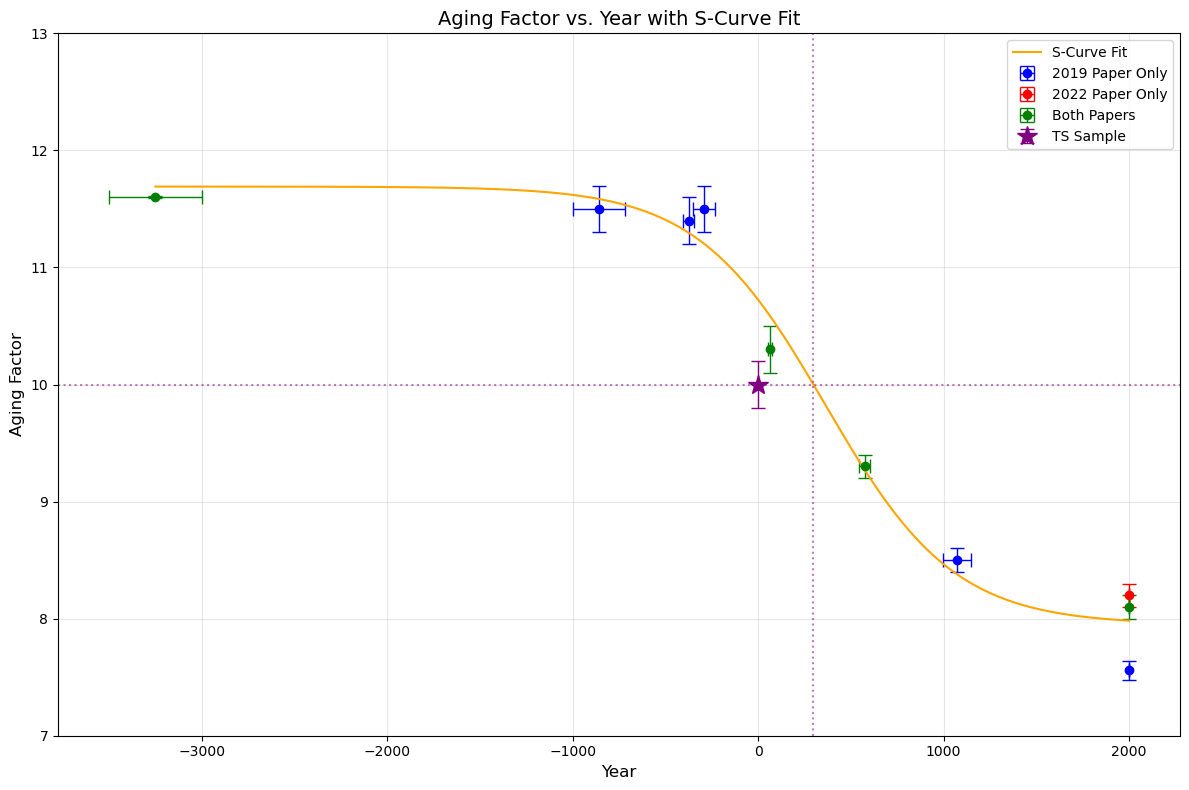

In [6]:


plt.figure(figsize=(12, 8))

# Define masks for different paper categories
mask_2019_only = (df['2019 Paper'] == 1) & (df['2022 Paper'] == 0)
mask_2022_only = (df['2019 Paper'] == 0) & (df['2022 Paper'] == 1)
mask_both = (df['2019 Paper'] == 1) & (df['2022 Paper'] == 1)
mask_valid = df['Known Min Yr'].notna() & df['Known Max Yr'].notna()

# Plot points
plt.errorbar(df[mask_2019_only]['Year_Mid'], df[mask_2019_only]['Aging Factor'],
            xerr=df[mask_2019_only]['Year_Range'],
            yerr=df[mask_2019_only]['Aging Factor Error'],
            fmt='o', color='blue', label='2019 Paper Only', 
            capsize=5, capthick=1, elinewidth=1)

plt.errorbar(df[mask_2022_only]['Year_Mid'], df[mask_2022_only]['Aging Factor'],
            xerr=df[mask_2022_only]['Year_Range'],
            yerr=df[mask_2022_only]['Aging Factor Error'],
            fmt='o', color='red', label='2022 Paper Only',
            capsize=5, capthick=1, elinewidth=1)

plt.errorbar(df[mask_both]['Year_Mid'], df[mask_both]['Aging Factor'],
            xerr=df[mask_both]['Year_Range'],
            yerr=df[mask_both]['Aging Factor Error'],
            fmt='o', color='green', label='Both Papers',
            capsize=5, capthick=1, elinewidth=1)

# Plot TS sample
ts_sample = df[df['Sample Name'] == 'TS']
ts_af = ts_sample['Aging Factor'].values[0]
ts_af_error = ts_sample['Aging Factor Error'].values[0]
plt.errorbar([0], [ts_af], yerr=[ts_af_error], 
            fmt='*', color='purple', markersize=15, label='TS Sample',
            capsize=5, capthick=1, elinewidth=1)

# Fit S-curve to known samples
x_data = df[mask_valid]['Year_Mid']
y_data = df[mask_valid]['Aging Factor']

# Initial parameter guesses
p0 = [max(y_data) - min(y_data),  # L: curve height
      0.001,                       # k: steepness
      np.mean(x_data),            # x0: midpoint
      min(y_data)]                # b: offset

# Fit the curve
popt, _ = curve_fit(s_curve, x_data, y_data, p0=p0, maxfev=10000)

# Generate points for smooth curve
x_smooth = np.linspace(min(x_data), max(x_data), 300)
y_smooth = s_curve(x_smooth, *popt)

# Plot the S-curve
plt.plot(x_smooth, y_smooth, '-', color='orange', label='S-Curve Fit')

# Find intersection with S-curve
def find_roots(x):
    return s_curve(x, *popt) - ts_af

# Find roots in the range of our data
from scipy.optimize import fsolve
x_guess = 0  # Initial guess
predicted_age_s = fsolve(find_roots, x_guess)[0]

print(f"Predicted age using S-curve fit: {predicted_age_s:.1f} years")

# Add vertical and horizontal lines showing prediction
plt.axvline(x=predicted_age_s, color='purple', linestyle=':', alpha=0.5)
plt.axhline(y=ts_af, color='purple', linestyle=':', alpha=0.5)

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Aging Factor', fontsize=12)
plt.title('Aging Factor vs. Year with S-Curve Fit', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust y-axis scale
plt.ylim(7, 13)

# Show the plot
plt.tight_layout()
plt.show()